### Picture Prediction vha. Cifar10 via keras.io

###### 1) Byg en model baseret ud fra Cifar10's datasæt. (https://keras.io/api/datasets/cifar10/)

###### 2) Find et billede en frø, en bil og et skib og bestem ud fra modellen billedets kategori.

###### 3) Evaluér modellen og plot hvor brugbar (præcis) modellen er.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Download cifar10 (datasættet) fra keras
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
# Viser indhold af datasættet
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', x_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_train shape: (10000, 32, 32, 3)


In [4]:
# Vis det første billede som et array
index = 0
print(x_train[index])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


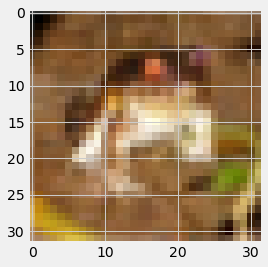

In [5]:
# Plot array som billede
img = plt.imshow(x_train[index])

In [6]:
# Vis billedets etiket
print('Billedets etiket findes på index', str(y_train[index]) + '.')

Billedets etiket findes på index [6].


In [7]:
# Deklarér kategorier for datasættets indhold
classification = ['fly', 'personbil', 'fugl', 'kat', 'rådyr', 'hund', 'frø', 'hest', 'skib', 'lastbil']

# Vis billedes kategori ud fra etiket
print('Billedet viser en', str(classification[y_train[index][0]]) + '.')

Billedet viser en frø.


In [8]:
# Konvertér katergorisk alle etiketter til sæt af 10 numre så det kan indlæses til det neurale netværk
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Viser hvilken plads indekset har for billedet
print(y_train_one_hot[index])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
# Normalisér alle pixels (fra RGB til HSV) så deres værdier ligger mellem 0 og 1
x_train = x_train / 255
x_test = x_test / 255

# Viser at værdierne er ændret
print(x_train[index])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [10]:
# Definér modellens arkitektur
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu')) # 1000 = Antal neuroner
model.add(Dropout(0.5))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [11]:
#pip install keras==2.7.0 --user
print('Tensorflow', tf.__version__)
print('Keras', keras.__version__)

Tensorflow 2.7.0
Keras 2.7.0


In [12]:
# Træn modellen
# Note-to-self: validation_split bruges til at splitte datasættet mellem træningsdata og valideringsdata for hver epoch.
#               Modellen træner med træningsdata og validerer vha. valideringsdata ved at tjekke loss og accuracy.
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 12s 75ms/step - loss: 1.7660 - accuracy: 0.3384 - val_loss: 1.4598 - val_accuracy: 0.4687
Epoch 2/10
157/157 [==============================] - 11s 73ms/step - loss: 1.3888 - accuracy: 0.4947 - val_loss: 1.2804 - val_accuracy: 0.5411
Epoch 3/10
157/157 [==============================] - 11s 70ms/step - loss: 1.2135 - accuracy: 0.5615 - val_loss: 1.1902 - val_accuracy: 0.5747
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 1.1149 - accuracy: 0.6032 - val_loss: 1.1134 - val_accuracy: 0.6099
Epoch 5/10
157/157 [==============================] - 11s 69ms/step - loss: 1.0303 - accuracy: 0.6344 - val_loss: 0.9948 - val_accuracy: 0.6539
Epoch 6/10
157/157 [==============================] - 11s 70ms/step - loss: 0.9426 - accuracy: 0.6666 - val_loss: 1.0000 - val_accuracy: 0.6508
Epoch 7/10
157/157 [==============================] - 11s 71ms/step - loss: 0.8905 - accuracy: 0.6858 - val_loss: 1.0124 - val_accuracy:

In [13]:
# Evaluér modellen vha. test datasættet
model_accuracy = model.evaluate(x_test, y_test_one_hot)[1]

# Vis hvor præcis modellen er i procent
print(model_accuracy*100, '%')

313/313 [==============================] - 1s 4ms/step - loss: 0.9221 - accuracy: 0.6873
68.73000264167786 %


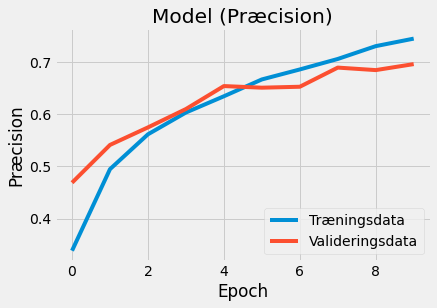

In [14]:
# Visualisér modellens præcision (Accuracy bør være stigende)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model (Præcision)')
plt.ylabel('Præcision')
plt.xlabel('Epoch')
plt.legend(['Træningsdata', 'Valideringsdata'], loc='lower right')
plt.show()

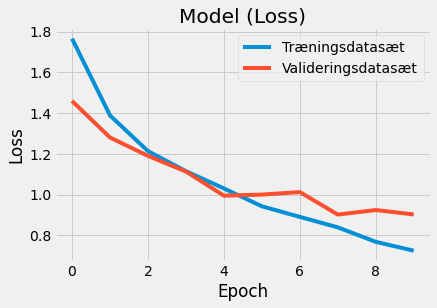

In [15]:
# Visualisér modellens 'loss' ved krydsvalidering (Loss bør være faldende)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Træningsdatasæt', 'Valideringsdatasæt'], loc='upper right')
plt.show()

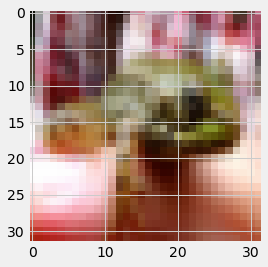

In [25]:
# Indlæs og skalér billede så det matcher input_shape
new_image = plt.imread('frog.jpg')
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [26]:
# Picture Prediction
predictions = model.predict(np.array([resized_image]))

# Viser sandsyndligheden for predictions indenfor modellens 10 opstillede kategorier (Højest er bedst)
print('Array\n', predictions)

# Sortér predictions fra mindst til højest sandsynlighed
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
# Vis de sortérede etikker efter orden
print('\nSorteret liste\n', list_index)

# Vis de første fem predictions med størst sandsynlighed
print('\nListe af de fem højst rangerede gæt')
for i in range(5):
    print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Array
 [[4.9159996e-04 4.8280912e-03 1.3216747e-02 3.2031524e-01 1.6151896e-02
  1.1448790e-01 5.2853996e-01 7.9298648e-04 2.2236875e-04 9.5322501e-04]]

Sorteret liste
 [6, 3, 5, 4, 2, 1, 9, 7, 0, 8]

Liste af de fem højst rangerede gæt
frø : 52.85 %
kat : 32.03 %
hund : 11.45 %
rådyr : 1.62 %
fugl : 1.32 %
